In [10]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#load the sample audio file as a floating point time series
filename = 'Small_audio_sample/118960_mole.wav'
chirp_song, sr = librosa.load(filename)
#cut out the talking at the beginning
chirp_song_chop = chirp_song[100000:]

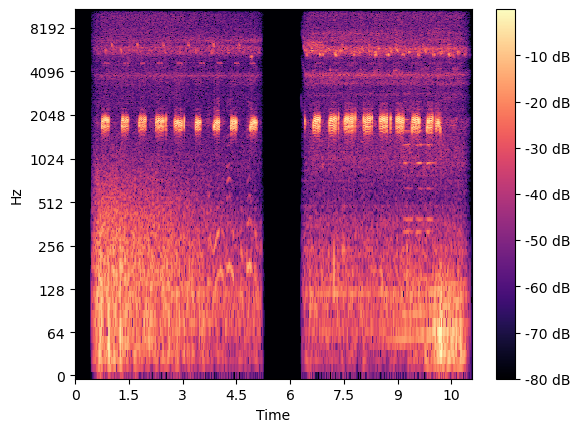

In [7]:
#The Mel spectrogram
hop_length = 512
n_fft = 2048
D = np.abs(librosa.stft(chirp_song_chop, n_fft=n_fft,  hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

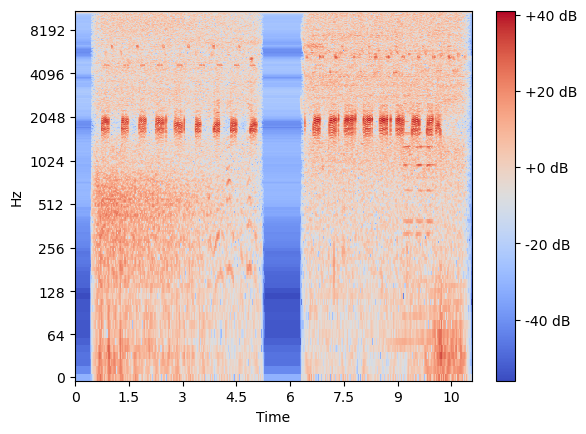

In [8]:
#the cleaned Mel spectogram
DBclean = np.zeros(D.shape)
for x in range(0,DB.shape[0]):
    med = np.median(DB[x, :])
    DBclean[x, :] = DB[x, :]-med
librosa.display.specshow(DBclean, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

(1000.0, 11000.0)

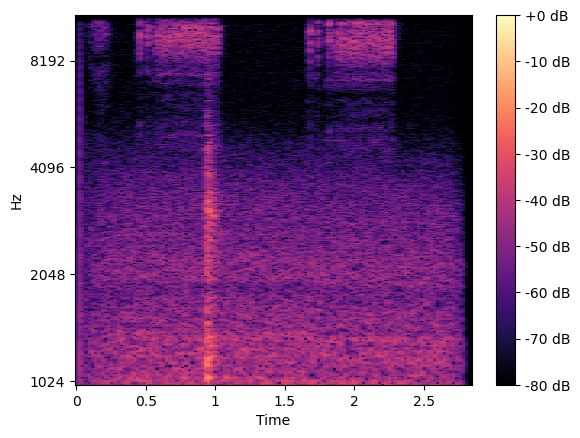

In [48]:
#The Mel spectrogram restricted
hop_length = 512
n_fft = 2048
D = np.abs(librosa.stft(chirp_song_chop, n_fft=n_fft,  hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.ylim((1000,11000))

(1000.0, 11000.0)

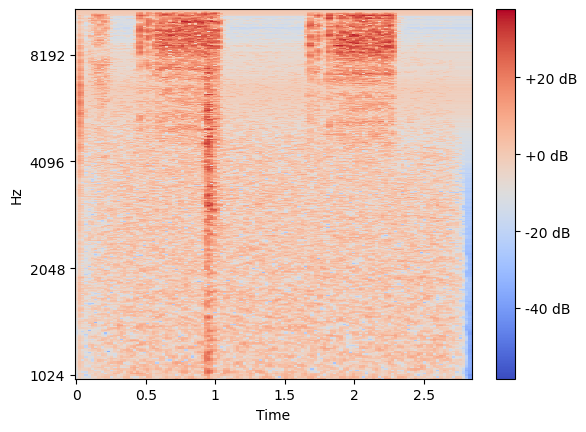

In [50]:
#The Mel spectrogram restricted cleaned
DBclean = np.zeros(D.shape)
for x in range(0,DB.shape[0]):
    med = np.median(DB[x, :])
    DBclean[x, :] = DB[x, :]-med
librosa.display.specshow(DBclean, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.ylim((1000,11000))

In [34]:
#load the sample audio file as a floating point time series
filename = 'Small_audio_sample/119884.wav'
chirp_song1, sr = librosa.load(filename)
#cut out the talking at the beginning
chirp_song_chop1 = chirp_song1[80000:220000]

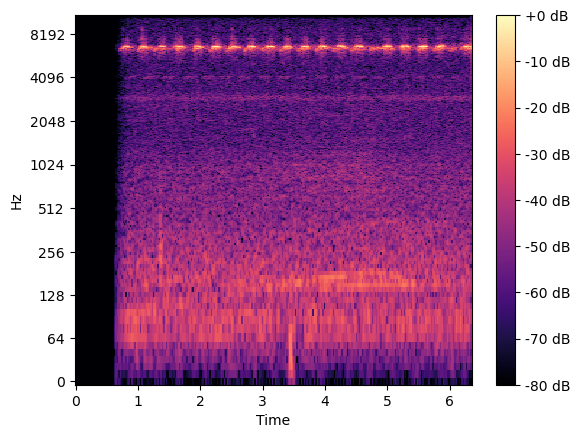

In [37]:
#The Mel spectrogram
hop_length = 512
n_fft = 2048
D1 = np.abs(librosa.stft(chirp_song_chop1, n_fft=n_fft,  hop_length=hop_length))
DB1 = librosa.amplitude_to_db(D1, ref=np.max)
librosa.display.specshow(DB1, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

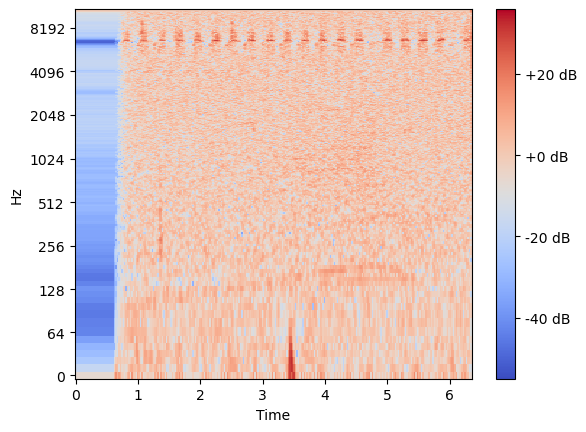

In [38]:
#the cleaned Mel spectogram
DBclean1 = np.zeros(D1.shape)
for x in range(0,DB1.shape[0]):
    med = np.median(DB1[x, :])
    DBclean1[x, :] = DB1[x, :]-med
librosa.display.specshow(DBclean1, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [1]:
#The Mel spectrogram restricted
hop_length = 1024
n_fft = 2048
D1 = np.abs(librosa.stft(chirp_song_chop1, n_fft=n_fft,  hop_length=hop_length))
DB1 = librosa.amplitude_to_db(D1, ref=np.max)
librosa.display.specshow(DB1, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.ylim((1000,11000))

NameError: name 'np' is not defined

(1000.0, 11000.0)

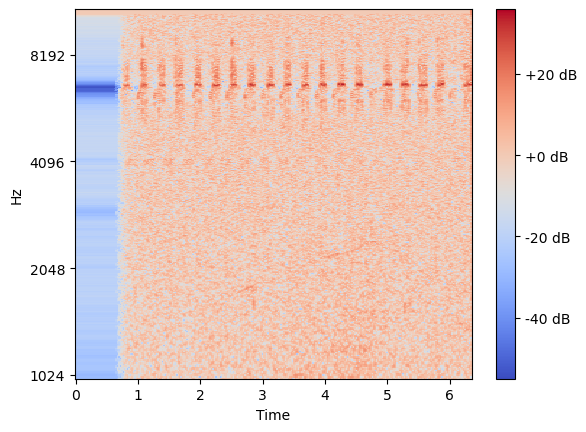

In [47]:
#The Mel spectrogram restricted cleaned
DBclean1 = np.zeros(D1.shape)
for x in range(0,DB1.shape[0]):
    med = np.median(DB1[x, :])
    DBclean1[x, :] = DB1[x, :]-med
librosa.display.specshow(DBclean1, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.ylim((1000,11000))

In [1]:
import os

In [147]:
def plot_song(song, sr):
    hop_length = 1024
    n_fft = 2048
    D = np.abs(librosa.stft(song, n_fft=n_fft,  hop_length=hop_length))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
    plt.colorbar(format='%+2.0f dB');
    plt.show()
    return None

def cut_out_voice(f):
    chirp_song, sr = librosa.load(f)
    i = 5000
    talk = True
    slide_sum = 0
    for x in range(0,5000):
        slide_sum = slide_sum + np.absolute(chirp_song[x])
    while (talk and i<len(chirp_song)-1):
        slide_sum = slide_sum + np.absolute(chirp_song[i])-np.absolute(chirp_song[i-5000])
        if slide_sum < 10**(-4):
            talk = False
            #print ('talking ends at ', i/22050)
        i = i+1
    silence = True
    while (silence and i<len(chirp_song)):
        slide_sum = slide_sum + np.absolute(chirp_song[i])-np.absolute(chirp_song[i-5000])
        if slide_sum > 1:
            print (np.absolute(chirp_song[i]))
            chop_ind = i
            i = i-5002
            silence = False
        i = i+1
    while (i<chop_ind+1):
        if np.absolute(chirp_song[i]) > 10**(-3):
            chop_ind = i
            print ('silence ends at ', i/22050)
            print(chirp_song[i])
        i = i+1
    return chirp_song[chop_ind:], chirp_song, sr

0.0068861274
silence ends at  3.6330612244897957
-0.0010056455


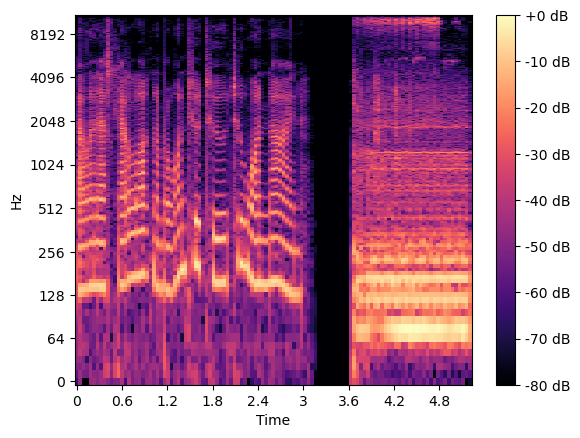

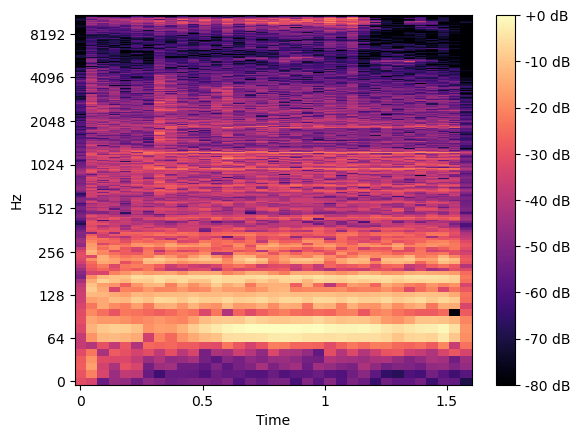

0.0020318863
silence ends at  4.273424036281179
-0.0010399291


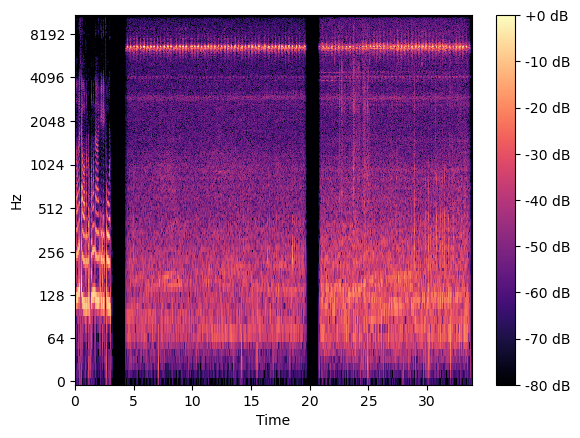

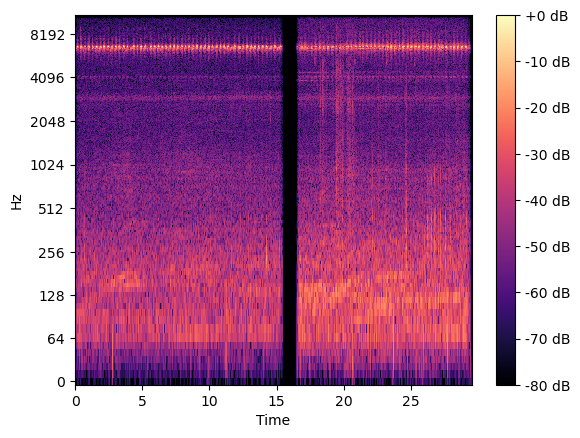

0.027131036
silence ends at  3.5913832199546487
-0.0012722015


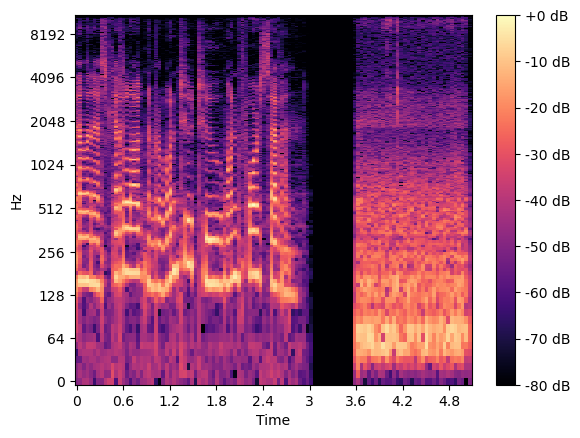

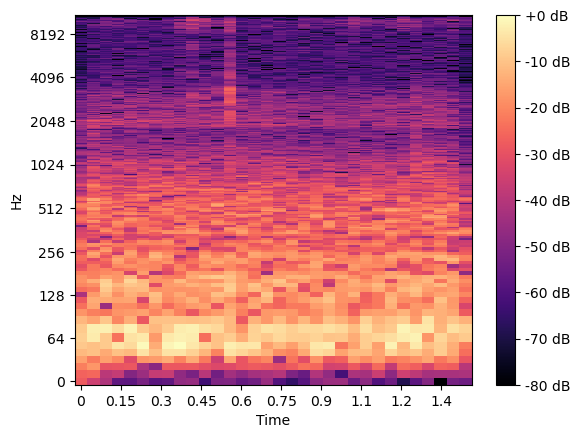

0.007422738
silence ends at  3.6785034013605444
-0.0012639742


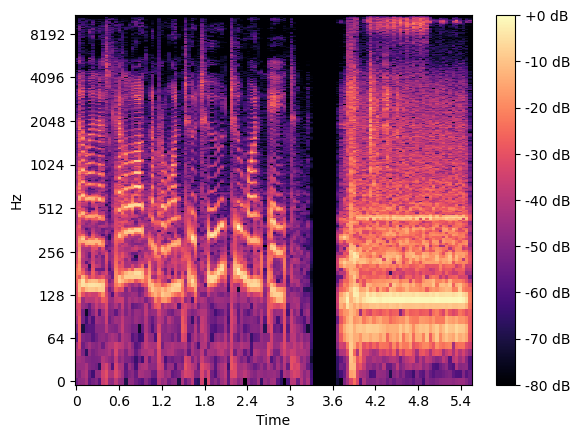

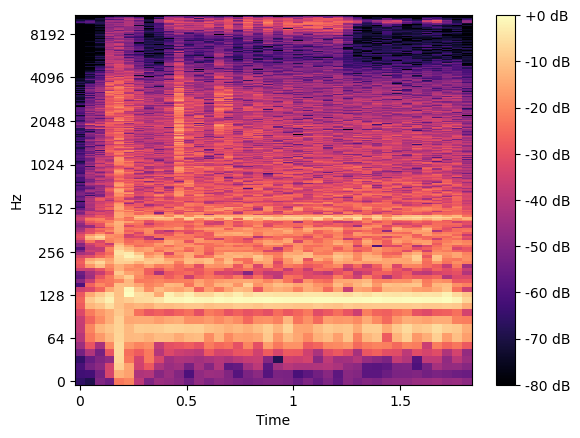

0.0051396387
silence ends at  4.968616780045352
0.0013456033


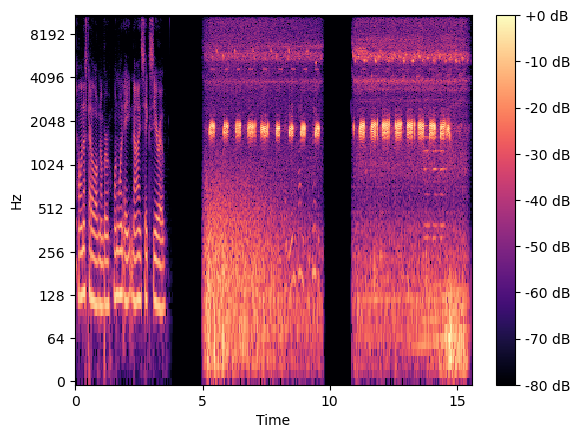

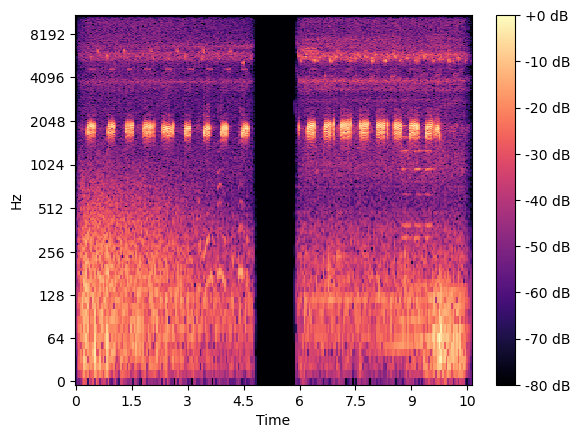

0.014939636
silence ends at  4.368843537414966
-0.001016072


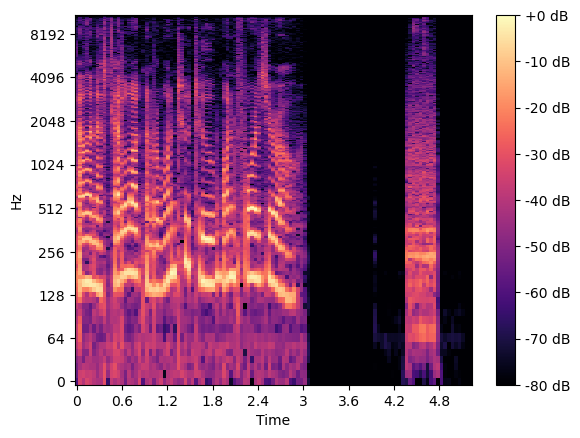

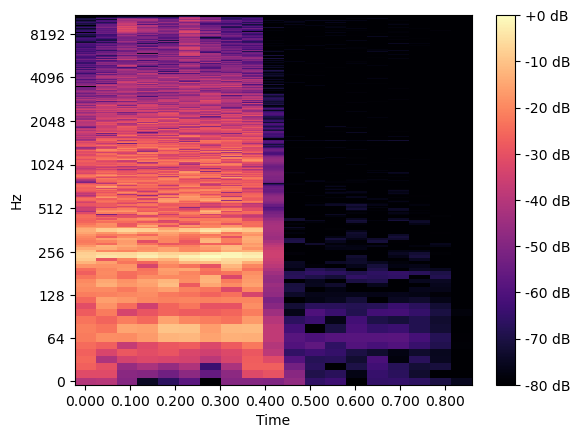

0.003628029
silence ends at  4.3874829931972785
0.0010701704


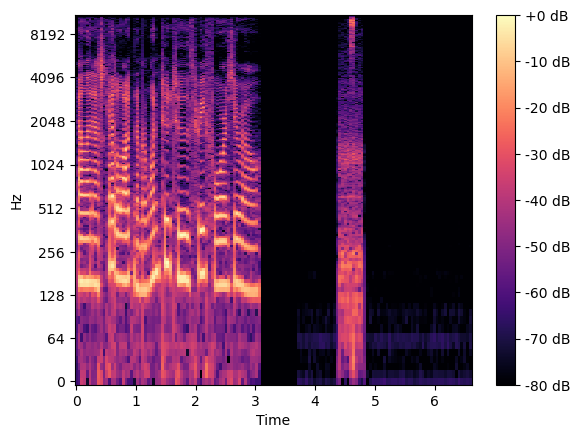

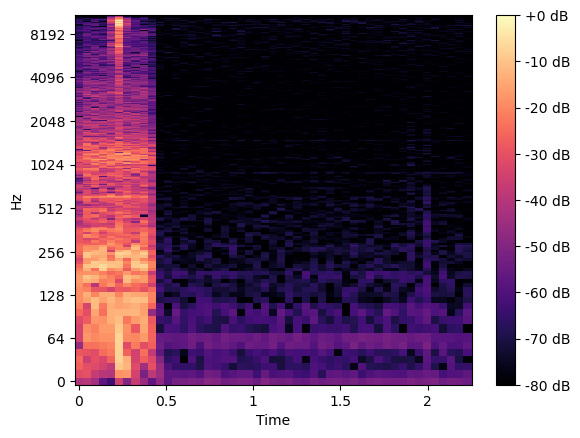

0.02500131
silence ends at  3.7407709750566895
-0.0012256433


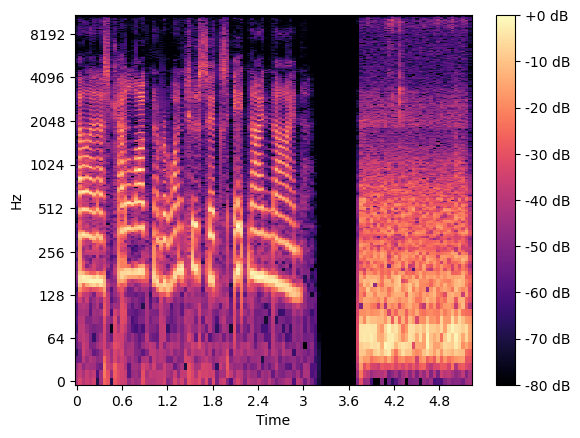

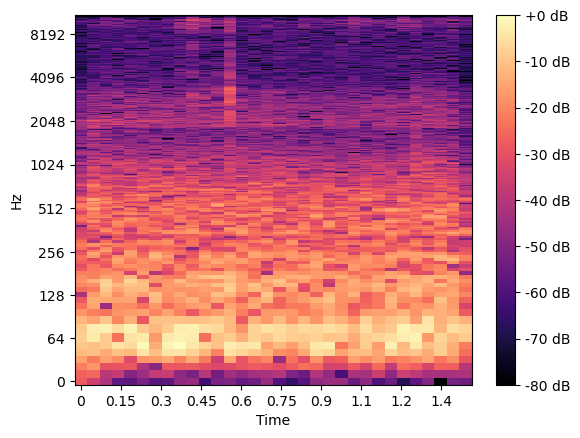

0.008447988
silence ends at  3.8481632653061224
-0.0010563702


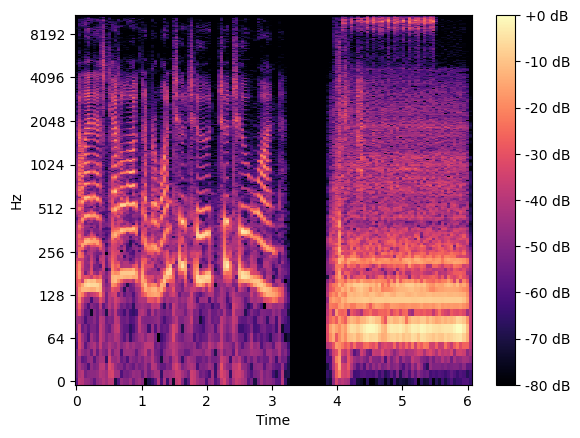

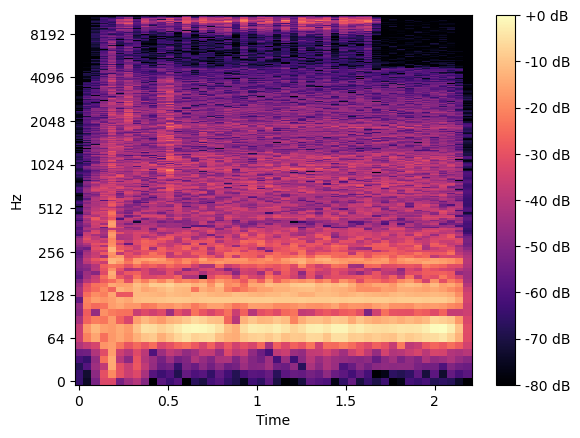

0.018264923
silence ends at  4.638412698412698
0.0010118112


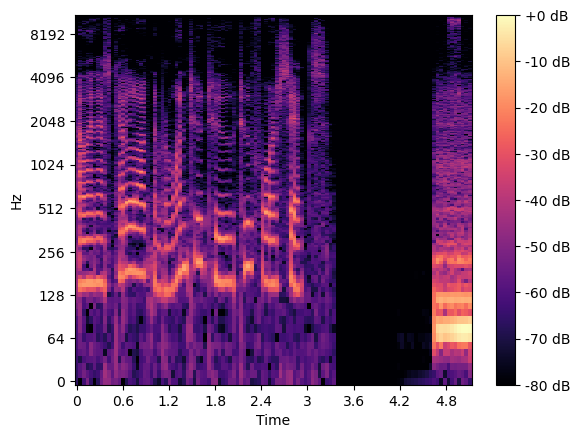

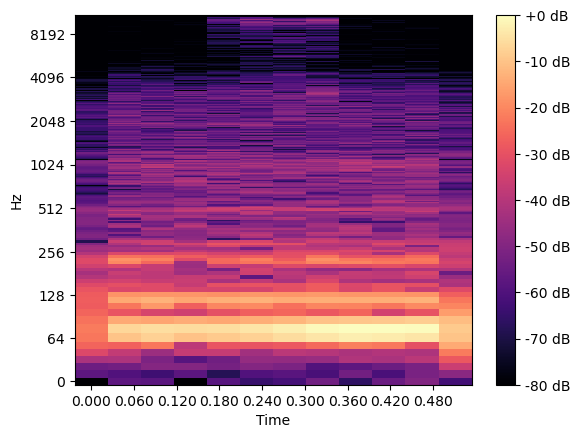

0.024671733
silence ends at  4.443945578231292
-0.001007393


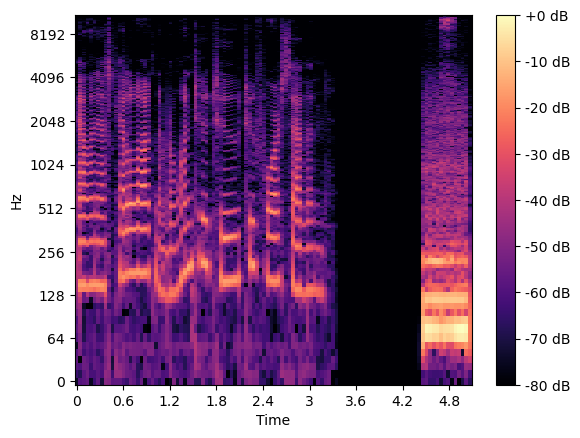

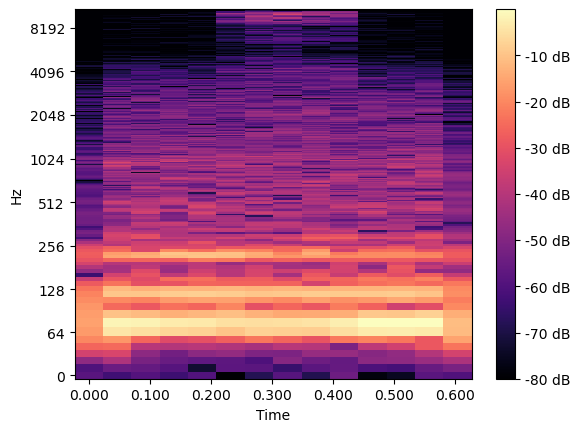

0.036061686
silence ends at  3.8368253968253967
-0.0010098333


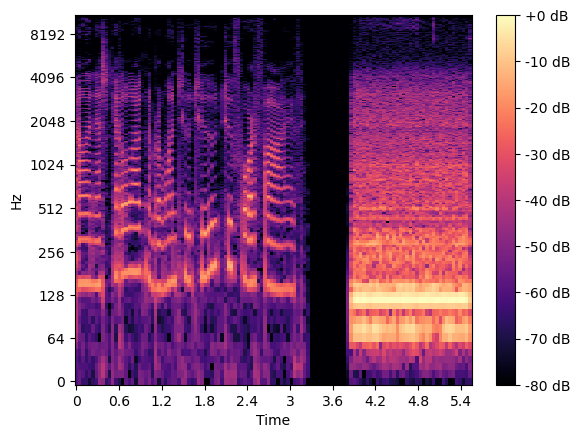

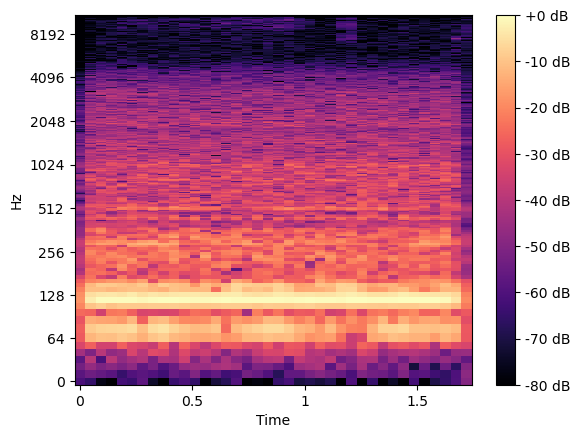

0.0046919235
silence ends at  4.081496598639456
-0.0010343343


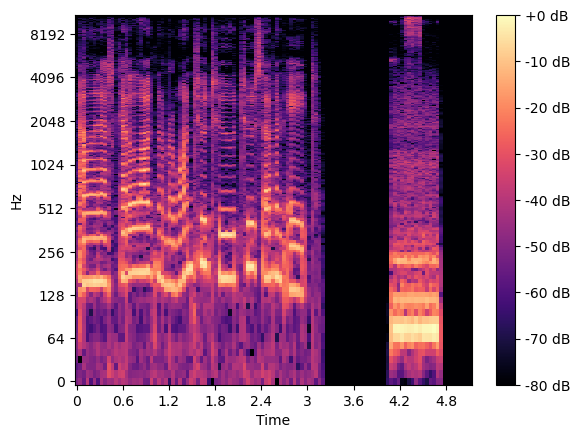

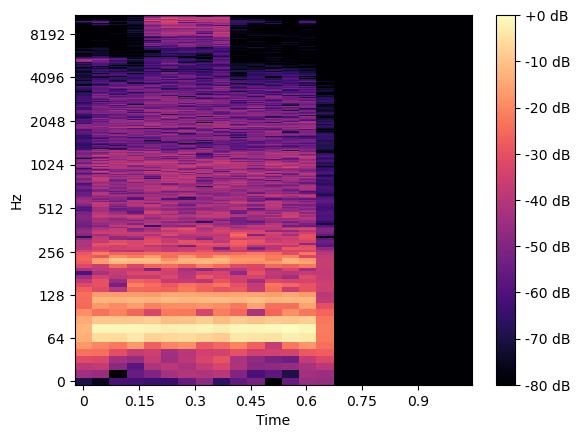

0.0150350835
silence ends at  4.003356009070295
-0.0010390086


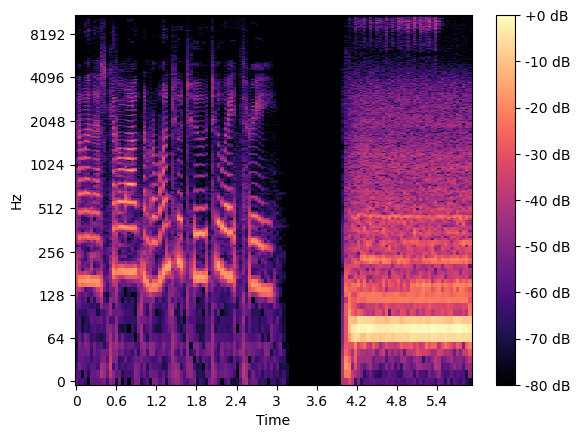

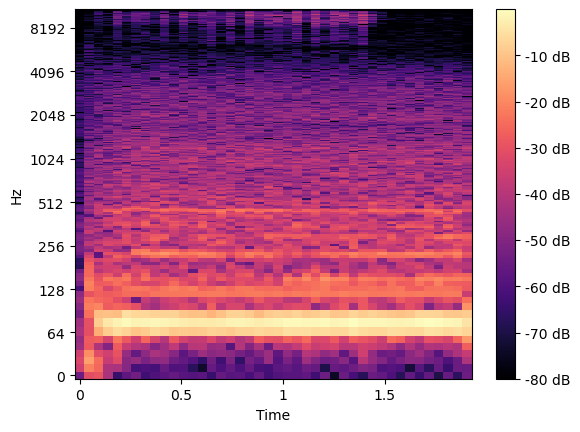

0.042425305
silence ends at  4.096643990929706
-0.0011326548


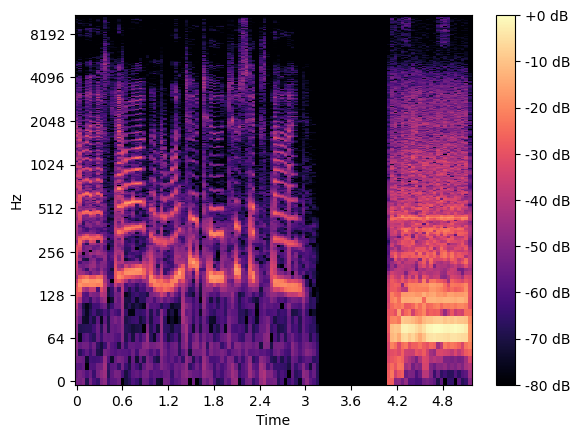

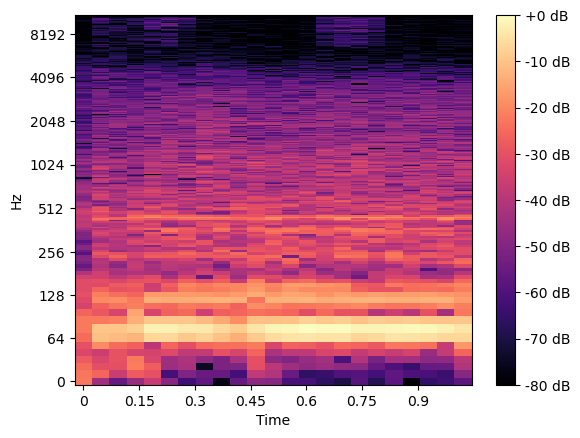

0.0028997276
silence ends at  4.015192743764172
0.0010179621


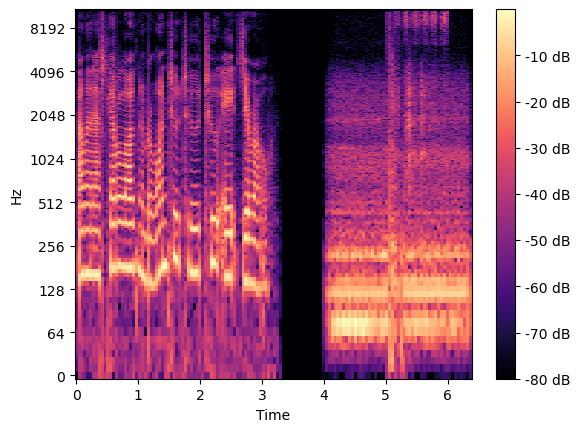

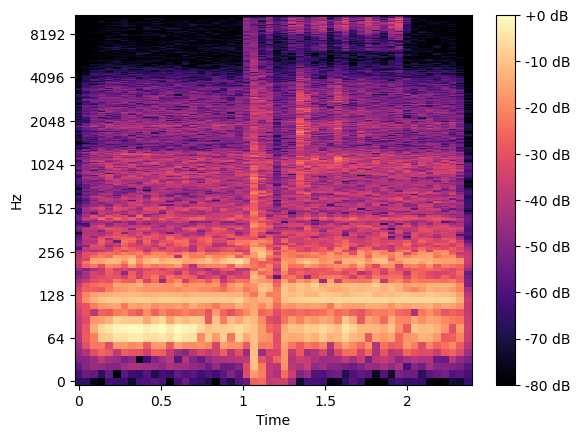

0.010507939
silence ends at  3.81156462585034
0.0010704012


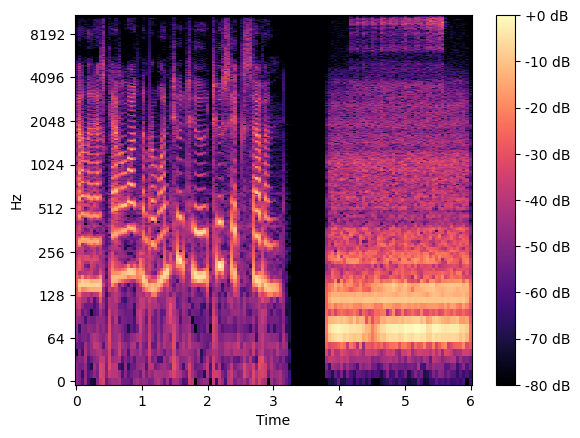

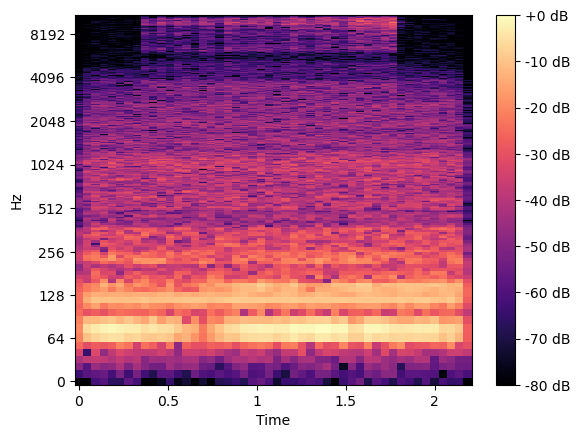

0.014161126
silence ends at  4.184172335600907
0.0010235137


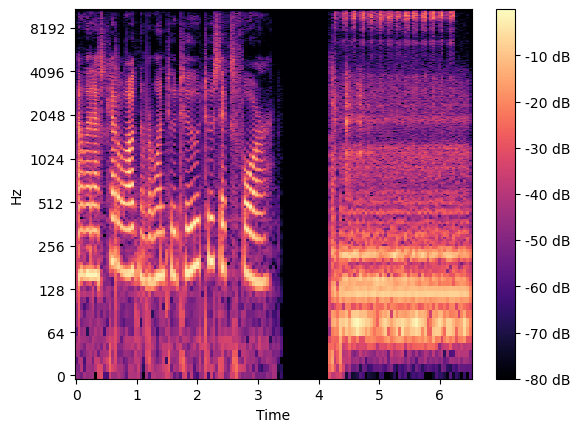

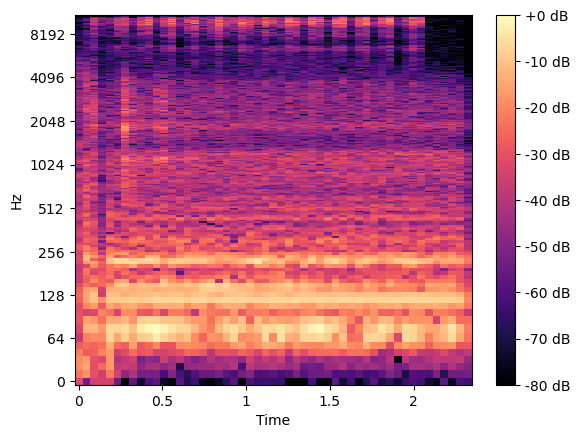

0.019052941
silence ends at  4.181315192743764
-0.0010761693


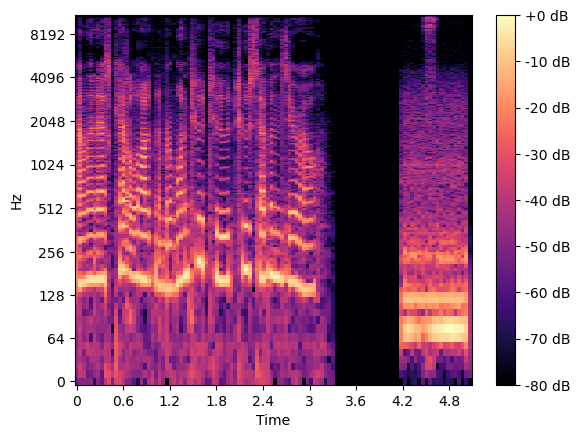

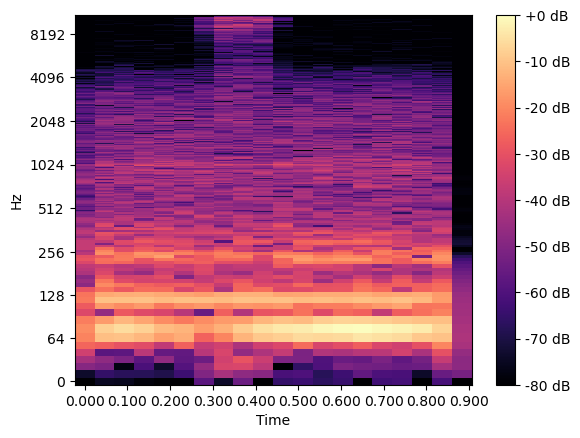

0.017387679
silence ends at  3.7286167800453516
0.0010425895


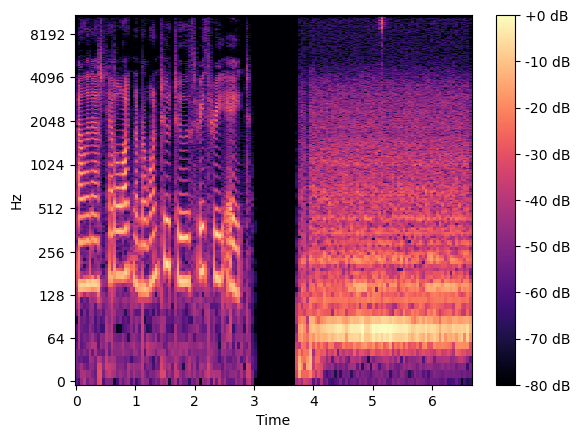

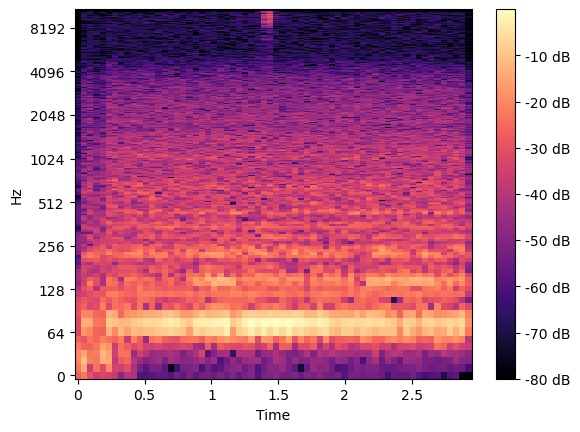

0.0048213815
silence ends at  3.916734693877551
-0.0010748794


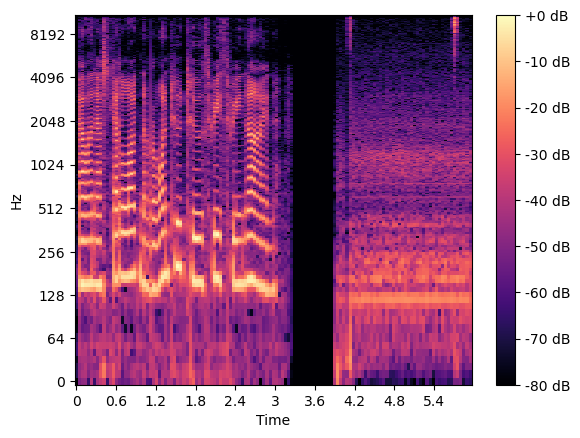

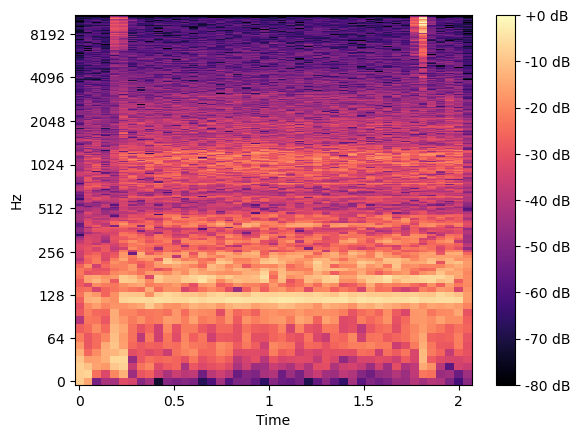

0.0045170654
silence ends at  4.404852607709751
0.0010874372


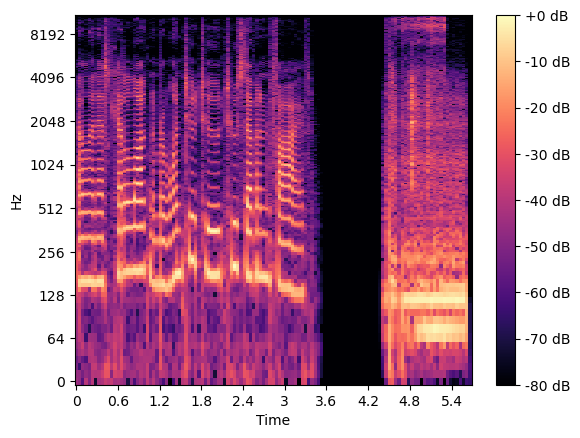

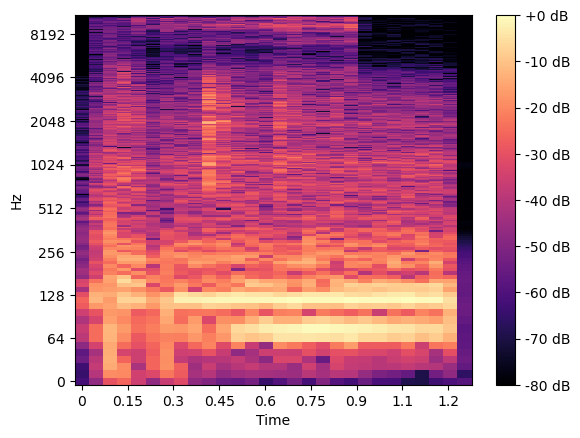

0.027647033
silence ends at  4.413378684807256
0.0013021044


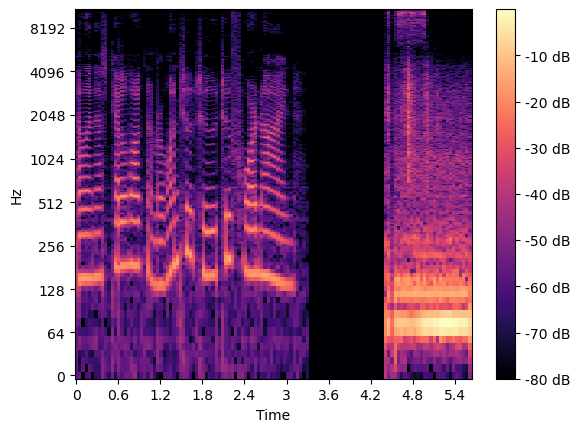

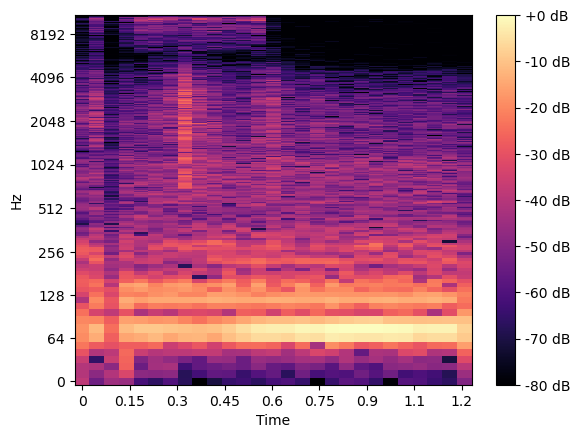

0.032051004
silence ends at  4.274331065759637
-0.0011617679


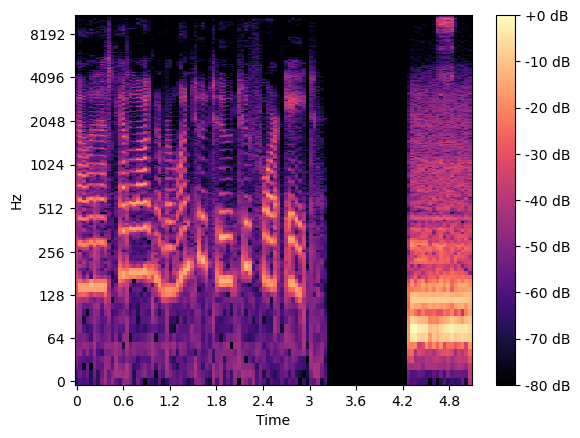

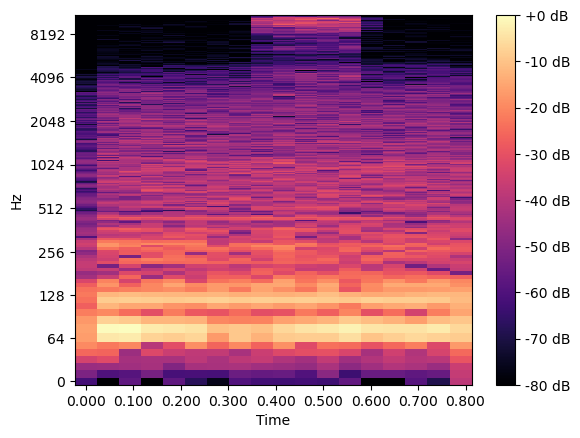

0.0071060797
silence ends at  4.623174603174603
0.0010517598


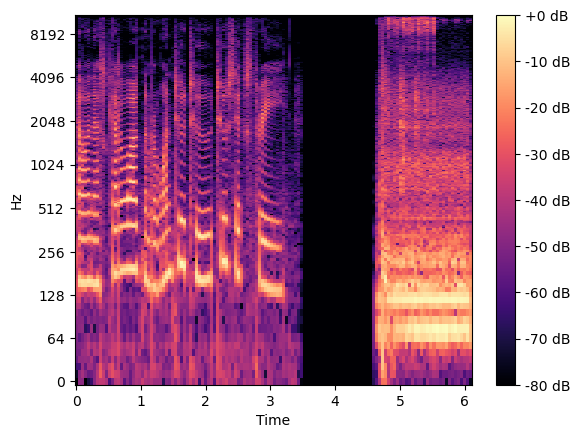

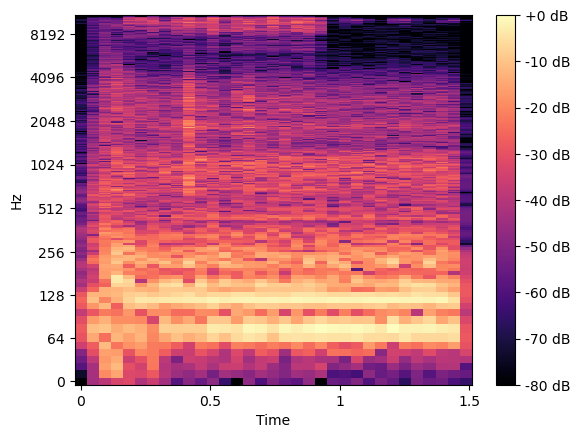

0.020784091
silence ends at  3.908707482993197
-0.0010888942


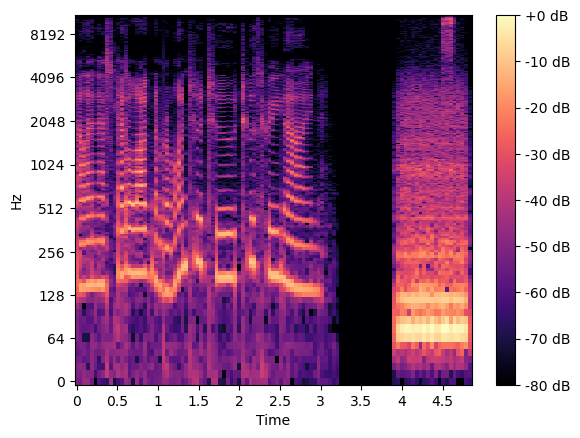

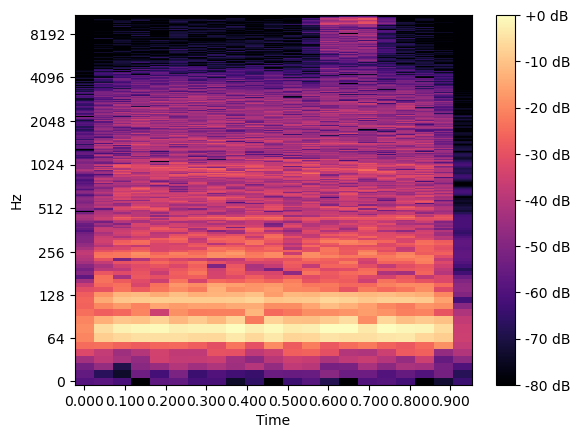

0.0054662805
silence ends at  3.8164172335600908
0.0010825573


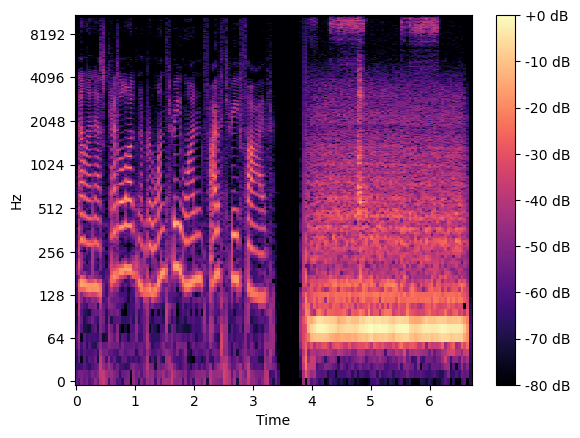

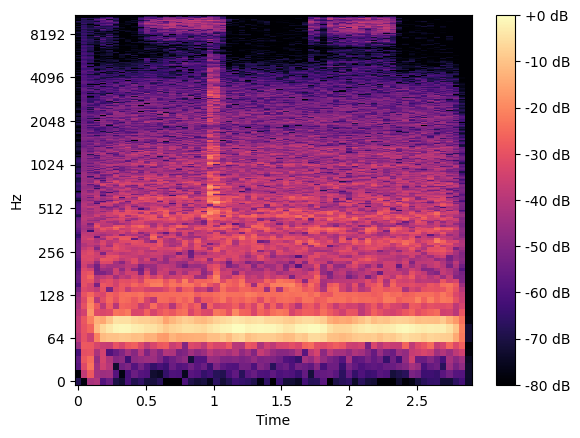

0.019336037
silence ends at  3.884308390022676
0.00100841


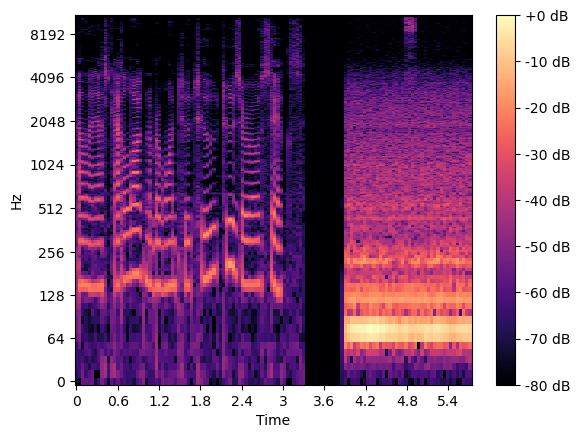

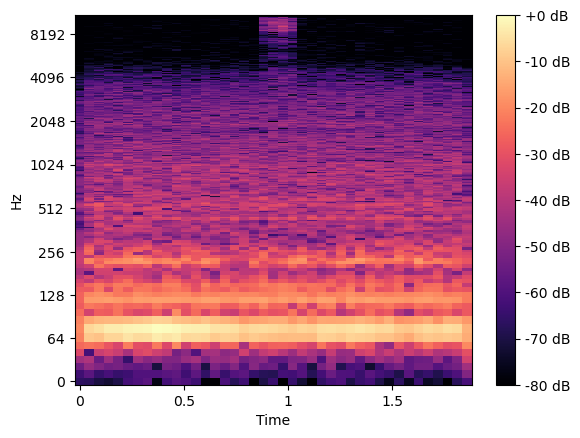

0.0061074514
silence ends at  4.265668934240363
-0.0011104387


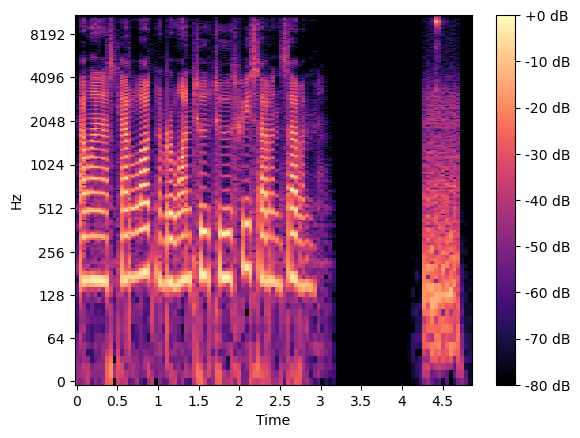

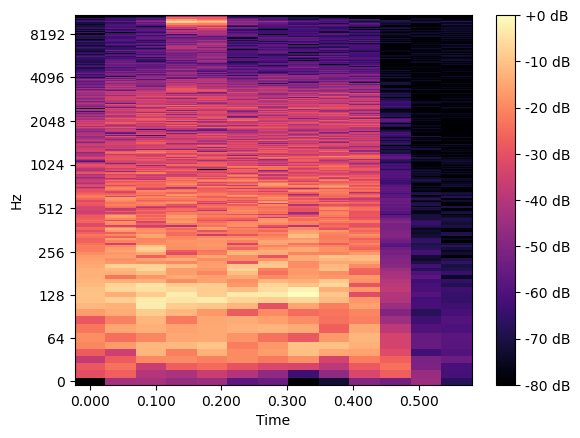

0.010840357
silence ends at  4.213696145124716
-0.001057972


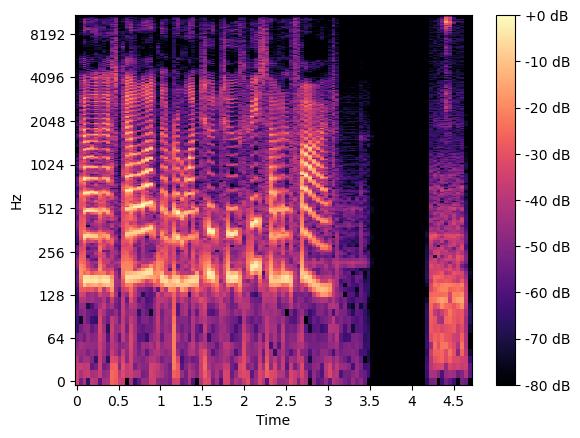

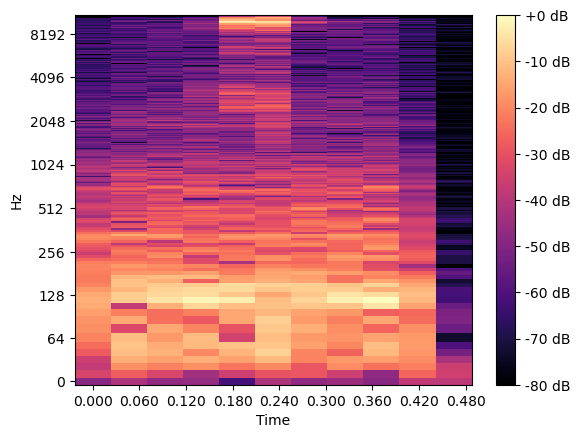

In [148]:
directory = '/Users/calvinyost-wolff/Documents/GitHub/ChirpChecker/Small_audio_sample'
hop_length = 1024
n_fft = 2048

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        chirp_song_chop, chirp_song, sr = cut_out_voice(f)
        plot_song(chirp_song, sr)
        plot_song(chirp_song_chop, sr)
        